In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
class DataGenerator:
    def __init__(self,p1,p2):
        self.p1 = p1
        self.p2 = p2
        
    def next(self):
        click1 = 1 if (np.random.randn() < self.p1) else 0
        click2 = 1 if (np.random.randn() < self.p2) else 0
        return click1, click2

In [3]:
def get_p_value(T):
    det = T[0,0]*T[1,1] - T[0,1]* T[1,0]
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
    p = 1 - chi2.cdf(x = c2, df = 1)
    return p

In [4]:
def run_experiment(p1,p2,N):
    data = DataGenerator(p1,p2)
    p_values = np.empty(N)
    T =np.zeros((2,2)).astype(np.float32)
    for i in range(N):
        c1, c2 = data.next()
        T[0,c1] += 1
        T[1,c2] += 1
        if i < 10:
            p_values[i] = 0
        else:
            p_values[i] = get_p_value(T)
    plt.plot(p_values)
    plt.plot(np.ones(N)*0.05)
    plt.show()

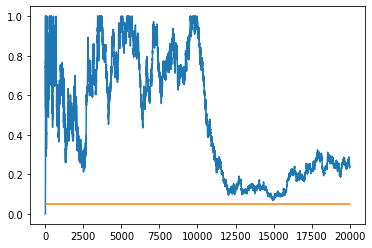

In [6]:
run_experiment(0.1,0.11,20000)